In [4]:
# Importing all the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [10]:
# importing our datasets.

a = pd.read_csv('/content/drive/MyDrive/ML Datasets/boston.csv')

boston = pd.DataFrame(a)

In [11]:
# Renaming MEDV to Prices for better understanding

boston = houses.rename(columns={'MEDV':'Prices'})

In [12]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prices
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [13]:
# checking for any null values

boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Prices     0
dtype: int64

In [14]:
# Looking at stastical measures of a dataset

boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prices
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
# Here we are looking at correlation to better understand our dataset.
# We have 2 types of correlation. Positive and negative.

corelation = boston.corr()

<Axes: >

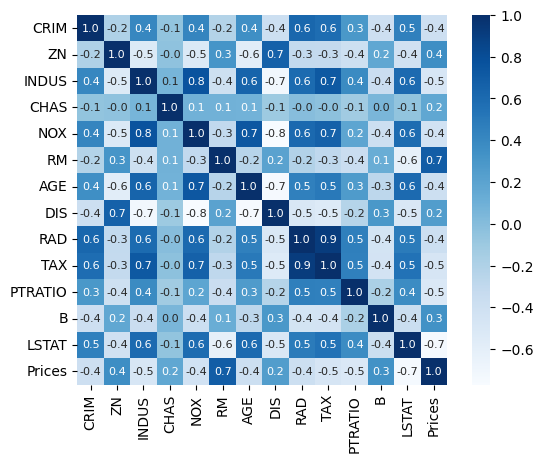

In [18]:
# We look at correlation using heatmaps

sns.heatmap(corelation, cbar=True, square=True, annot=True, annot_kws={'size':8}, fmt='.1f', cmap='Blues')

# Now we can see LSTAT and Price. LSTAT meaning Lower Financial Status living in that particular area.
# We can see Price and LSTAT are negatively correlated.

In [20]:
# Splitting our data.

X = houses.drop(columns='Prices')

In [22]:
Y = houses['Prices']

In [24]:
# Splitting the data into training and testing data.

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [25]:
# Looking at the split

print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


In [26]:
# Importing our XGBRegressor Model

model = XGBRegressor()

In [27]:
# Fitting the training data i.e the data we want our model to look at and train

model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
# Doing X_train_prediction first.
# Here we go with r_squared and mean_absolute to determine if our models are performing well.

X_train_prediction = model.predict(X_train)

r_squared = metrics.r2_score(X_train_prediction, Y_train)
mean_absolute = metrics.mean_absolute_error(X_train_prediction, Y_train)

print(r_squared)
print(mean_absolute)

0.9999980033283415
0.0091330346494618


In [30]:
# As we did above for X_train, we do the same for Y_train

X_test_prediction = model.predict(X_test)

r_squared2 = metrics.r2_score(X_test_prediction, Y_test)
mean_absolute2 = metrics.mean_absolute_error(X_test_prediction, Y_test)

print(r_squared2)
print(mean_absolute2)

0.8981202947242624
2.0748727686264927


Text(0.5, 1.0, 'X-train-prediction')

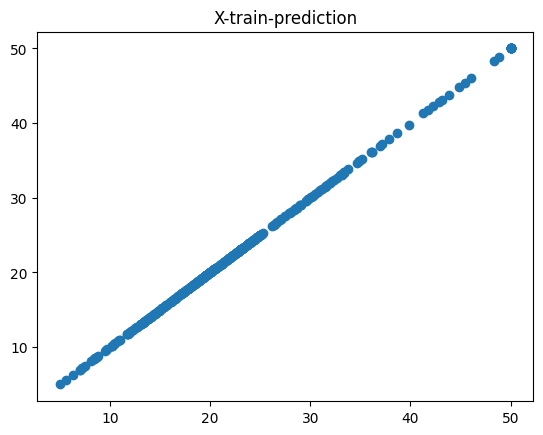

In [31]:
# Plotting our data so we can understand it better
# This is for X_train_prediciton

plt.scatter(X_train_prediction, Y_train)
plt.title('X-train-prediction')

Text(0.5, 1.0, 'X-test-prediction')

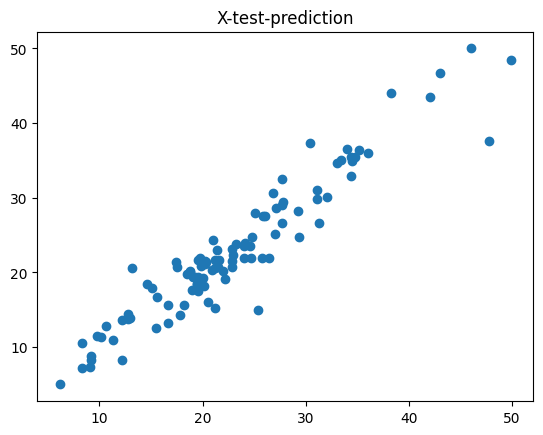

In [32]:
# This is for Y_train_prediction

plt.scatter(X_test_prediction, Y_test)
plt.title('X-test-prediction')